In [1]:
import pandas as pd
import matplotlib.pyplot as ppt
import seaborn as sb

In [2]:
#Load the dataset Train.csv to Dataframe
df = pd.read_csv(r'C:\Users\Qbits\Downloads\titanic\train.csv')

In [3]:
#Display first 10 rows of data frame
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Data Cleaning

In [4]:
#Identifying missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Filling the missing values for Age column with median
df.fillna(df['Age'].median(), inplace=True)

In [6]:
#Filling the missing values for Embarked column with mode
df.fillna(df['Embarked'].mode()[0], inplace=True)

In [7]:
#As Cabin has many null values so Removing the column from data frame
df.drop(['Cabin'], axis=1, inplace=True)

In [8]:
#Remove any duplicates
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [22]:
# Create a new column 'AgeGroup'
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 59, 100], labels=['Child', 'Adult', 'Senior'])

In [23]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


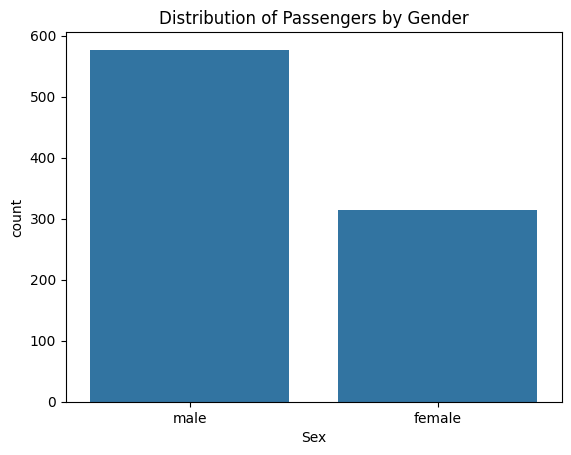

In [24]:
# Bar plot for gender distribution
sb.countplot(data=df, x='Sex')
ppt.title('Distribution of Passengers by Gender')
ppt.show()

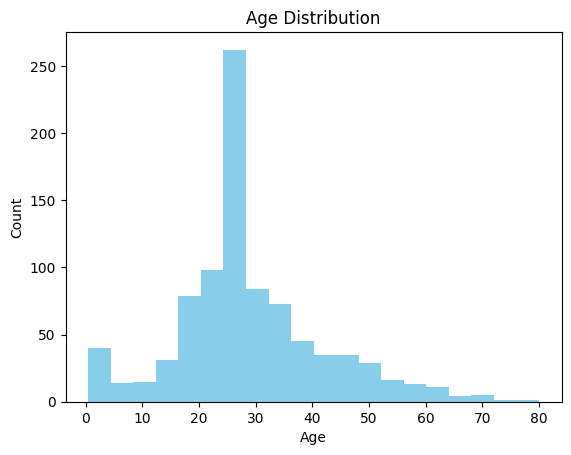

In [42]:
# Histogram for age distribution
ppt.hist(df['Age'], bins=20, color='skyblue')
ppt.title('Age Distribution')
ppt.xlabel('Age')
ppt.ylabel('Count')
ppt.show()

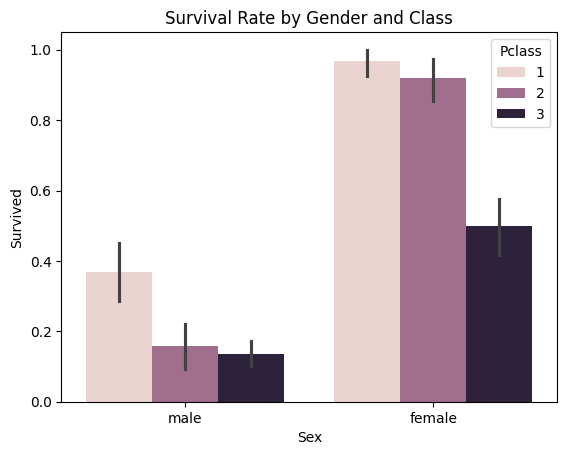

In [26]:
# Survival rate by gender and class
sb.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
ppt.title('Survival Rate by Gender and Class')
ppt.show()

In [ ]:
sb.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
ppt.title('Survival Rate by Gender and Class')
ppt.show()

In [27]:
# Mean, Median, and Mode for Fare and Age
mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()
mode_fare = df['Fare'].mode()[0]

mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

print(f'Mean Fare: {mean_fare:.2f}, Median Fare: {median_fare:.2f}, Mode Fare: {mode_fare:.2f}')
print(f'Mean Age: {mean_age:.2f}, Median Age: {median_age:.2f}, Mode Age: {mode_age:.2f}')

Mean Fare: 32.20, Median Fare: 14.45, Mode Fare: 8.05
Mean Age: 29.36, Median Age: 28.00, Mode Age: 28.00


In [28]:
from scipy.stats import ttest_ind

# Survival rates for male and female
male_survival = df[df['Sex'] == 'male']['Survived']
female_survival = df[df['Sex'] == 'female']['Survived']

# Perform t-test
t_stat, p_val = ttest_ind(male_survival, female_survival)

print(f'T-test statistic: {t_stat:.2f}, p-value: {p_val}')

T-test statistic: -19.30, p-value: 1.4060661308802591e-69
